In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import io
import glob

# Exploring Johns Hopkins COVID-19 US states data
* [csv files here](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports_us)
* "COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University" or "JHU CSSE COVID-19 Data" for short, and the url: https://github.com/CSSEGISandData/COVID-19.
* Using Python, Pandas and Matplotlib as a tutorial for creating simple visualizations

## Get the Data
The `.csv` files can be found at this [url](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports_us). For our purposes, the files have been pulled down into the `/data` directory. They may not be up to date.

If you want to get the up to date files, you can simply clone [this repo](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data) and copy the files in the directory named `/csse_covid_19_data/csse_covid_19_daily_reports_us` into the `data` directory, replacing what is in there currently.

## Read in the Data

Use a magic command to check the contents of the `/data` directory

In [2]:
# ls data

<br>

### We'll start by reading in just one `.csv` file, using pandas

In [3]:
df_one_row = pd.read_csv('data/08-16-2020.csv')

You can type the variable name to get a display of the dataframe

In [4]:
df_one_row

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-08-17 04:30:23,32.3182,-86.9023,108433,1898,41523.0,65012.0,1.0,2211.480905,846424.0,12607.0,1.750390,84000001,USA,17262.738404,11.626534
1,Alaska,US,2020-08-17 04:30:23,61.3707,-152.4044,4259,28,1418.0,2813.0,2.0,582.192483,301515.0,NaN,0.657431,84000002,USA,41216.193126,NaN
2,American Samoa,US,2020-08-17 04:30:23,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,1514.0,NaN,NaN,16,ASM,2721.015079,NaN
3,Arizona,US,2020-08-17 04:30:23,33.7298,-111.4312,193537,4506,27582.0,161449.0,4.0,2658.943877,1091974.0,20755.0,2.328237,84000004,USA,15002.286804,10.724048
4,Arkansas,US,2020-08-17 04:30:23,34.9697,-92.3731,52665,599,45572.0,6494.0,5.0,1745.143157,622050.0,3570.0,1.137378,84000005,USA,20612.670670,6.778696
5,California,US,2020-08-17 04:30:23,36.1162,-119.6816,623873,11243,NaN,612630.0,6.0,1578.936725,9798135.0,NaN,1.802130,84000006,USA,24797.731578,NaN
6,Colorado,US,2020-08-17 04:30:23,39.0598,-105.3111,53157,1896,5660.0,45601.0,8.0,923.067145,859734.0,6727.0,3.566793,84000008,USA,14929.213633,12.654965
7,Connecticut,US,2020-08-17 04:30:23,41.5978,-72.7554,50897,4453,8809.0,37635.0,9.0,1427.570908,937690.0,11015.0,8.749042,84000009,USA,26300.547473,21.641747
8,Delaware,US,2020-08-17 04:30:23,39.3185,-75.5071,16451,593,8671.0,7187.0,10.0,1689.423721,210385.0,NaN,3.604644,84000010,USA,21605.337638,NaN
9,Diamond Princess,US,2020-08-17 04:30:23,NaN,NaN,49,0,NaN,49.0,88888.0,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


Use the `.head()` method to see a certain number of rows from the dataframe

In [5]:
df_one_row.head(5)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-08-17 04:30:23,32.3182,-86.9023,108433,1898,41523.0,65012.0,1.0,2211.480905,846424.0,12607.0,1.750390,84000001,USA,17262.738404,11.626534
1,Alaska,US,2020-08-17 04:30:23,61.3707,-152.4044,4259,28,1418.0,2813.0,2.0,582.192483,301515.0,NaN,0.657431,84000002,USA,41216.193126,NaN
2,American Samoa,US,2020-08-17 04:30:23,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,1514.0,NaN,NaN,16,ASM,2721.015079,NaN
3,Arizona,US,2020-08-17 04:30:23,33.7298,-111.4312,193537,4506,27582.0,161449.0,4.0,2658.943877,1091974.0,20755.0,2.328237,84000004,USA,15002.286804,10.724048
4,Arkansas,US,2020-08-17 04:30:23,34.9697,-92.3731,52665,599,45572.0,6494.0,5.0,1745.143157,622050.0,3570.0,1.137378,84000005,USA,20612.670670,6.778696


Notice that each `.csv` has a single entry for each date.

<br>

### Now, let's read in all the `.csv` files and append them to a single dataframe
Since we are assuming consistent columns across all csv files, we can use `glob` to get all files that have the same extension.

In [6]:
all_files = glob.glob('data/*.csv')

And we can iterate over the list of files, read each into its own dataframe and then concatenate all the dataframes into a single dataframe 

In [7]:
df_list = []

for filename in all_files:
    df_one = pd.read_csv(filename, index_col=None, header=0)
    df_list.append(df_one)
    
df = pd.concat(df_list, axis=0, ignore_index=True)

In [8]:
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-06-08 03:33:42,32.3182,-86.9023,20500,692,11395.0,8413.0,1.0,418.095585,259566.0,2022.0,3.375610,84000001.0,USA,5293.824320,9.863415
1,Alaska,US,2020-06-08 03:33:42,61.3707,-152.4044,543,10,382.0,151.0,2.0,74.226466,64904.0,NaN,1.841621,84000002.0,USA,8872.181479,NaN
2,American Samoa,US,2020-06-08 03:33:42,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,174.0,NaN,NaN,16.0,ASM,312.719038,NaN
3,Arizona,US,2020-06-08 03:33:42,33.7298,-111.4312,26989,1051,5517.0,20421.0,4.0,370.793369,281621.0,3352.0,3.894179,84000004.0,USA,3869.102206,12.419875
4,Arkansas,US,2020-06-08 03:33:42,34.9697,-92.3731,9426,154,6424.0,2848.0,5.0,312.346329,160273.0,844.0,1.633779,84000005.0,USA,5310.914824,8.953957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7379,Washington,US,2020-04-25 06:32:46,47.4009,-121.4905,12977,722,NaN,12255.0,53.0,171.894387,160324.0,455.0,5.563690,84000053.0,USA,2123.664613,3.506203
7380,West Virginia,US,2020-04-25 06:32:46,38.4912,-80.9545,1010,32,439.0,978.0,54.0,76.341763,29811.0,97.0,3.168317,84000054.0,USA,2253.291388,9.603960
7381,Wisconsin,US,2020-04-25 06:32:46,44.2685,-89.6165,5356,263,NaN,5093.0,55.0,103.506165,59929.0,1353.0,4.910381,84000055.0,USA,1158.144318,25.261389
7382,Wyoming,US,2020-04-25 06:32:46,42.7560,-107.3025,473,7,321.0,466.0,56.0,95.125090,8045.0,54.0,1.479915,84000056.0,USA,1617.930979,11.416490


**How many rows are in the dataframe?**

In [9]:
len(df)

7384

**What are the datatypes for the features in this dataframe?**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        7384 non-null   object 
 1   Country_Region        7384 non-null   object 
 2   Last_Update           7365 non-null   object 
 3   Lat                   7112 non-null   float64
 4   Long_                 7112 non-null   float64
 5   Confirmed             7384 non-null   int64  
 6   Deaths                7384 non-null   int64  
 7   Recovered             5687 non-null   float64
 8   Active                7367 non-null   float64
 9   FIPS                  7365 non-null   float64
 10  Incident_Rate         7112 non-null   float64
 11  People_Tested         7112 non-null   float64
 12  People_Hospitalized   4722 non-null   float64
 13  Mortality_Rate        7239 non-null   float64
 14  UID                   7384 non-null   float64
 15  ISO3                 

Note that there are null values in this dataframe. We don't yet know completely what those are, but we can see in the view of the dataframe above that there are `NaN` values, as well as a row with a state name of "Recovered"

In [11]:
df.shape

(7384, 18)

**What are the names of the features in our dataframe?**

In [12]:
cols = list(df.columns)
cols

['Province_State',
 'Country_Region',
 'Last_Update',
 'Lat',
 'Long_',
 'Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'FIPS',
 'Incident_Rate',
 'People_Tested',
 'People_Hospitalized',
 'Mortality_Rate',
 'UID',
 'ISO3',
 'Testing_Rate',
 'Hospitalization_Rate']

**How to get simple summary stats for a dataframe?**

In [13]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,7112.000000,7112.000000,7384.000000,7384.000000,5687.000000,7367.000000,7365.000000,7112.000000,7.112000e+03,4722.000000,7239.000000,7.384000e+03,7112.000000,4722.000000
mean,36.840089,-85.206614,42929.668202,1886.046993,15715.890276,29185.785802,3263.131704,621.692892,4.925966e+05,5847.645489,3.805567,7.677976e+07,8090.353866,12.384791
std,10.790150,49.311679,79123.839218,4342.452374,29934.449445,65395.623381,17194.211148,571.718000,9.128971e+05,13582.722201,2.750242,2.355270e+07,6604.141044,5.278946
min,-14.271000,-170.132200,0.000000,0.000000,0.000000,-120720.000000,1.000000,0.000000,3.000000e+00,2.000000,0.000000,1.600000e+01,5.391708,1.418440
25%,34.594600,-101.165775,2913.750000,78.000000,953.000000,972.000000,18.000000,169.390910,6.097675e+04,528.500000,2.023230,8.400001e+07,2698.856242,8.568165
50%,39.061850,-87.944200,14308.000000,432.500000,4249.000000,7301.000000,32.000000,427.067957,1.915395e+05,1893.000000,3.477547,8.400003e+07,6489.556011,11.543521
75%,42.361650,-76.970625,46921.250000,1696.250000,18519.000000,24391.000000,48.000000,935.314881,5.328238e+05,5514.500000,4.962696,8.400004e+07,11837.956742,15.688110
max,61.370700,145.673900,623873.000000,32840.000000,399572.000000,612630.000000,99999.000000,2966.747935,9.798135e+06,89995.000000,70.370370,8.410000e+07,41216.193126,38.501190


Be careful how you interpret these values. Here they have no useful meaning, as we are including some rows that are not from a specific state. In addition, the values are in time series and from different states. Thus the simple summary statistics will not serve analysis at this point.

In [14]:
df.tail(10)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
7374,Texas,US,2020-04-25 06:32:46,31.0545,-97.5635,23642,624,9156.0,23018.0,48.0,102.860350,242547.0,1674.0,2.639371,84000048.0,USA,1055.260529,7.080619
7375,Utah,US,2020-04-25 06:32:46,40.1500,-111.8624,3782,39,1252.0,3743.0,49.0,131.966355,84697.0,315.0,1.031200,84000049.0,USA,2955.355454,8.328926
7376,Vermont,US,2020-04-25 06:32:46,44.0459,-72.7107,827,44,1710.0,783.0,50.0,135.442547,14310.0,32.0,5.320435,84000050.0,USA,2343.631007,3.869407
7377,Virgin Islands,US,2020-04-25 06:32:46,18.3358,-64.8963,54,3,50.0,51.0,78.0,50.341201,696.0,NaN,5.555556,850.0,VIR,648.842152,NaN
7378,Virginia,US,2020-04-25 06:32:46,37.7693,-78.1700,11594,411,1672.0,11183.0,51.0,146.625304,69440.0,1837.0,3.544937,84000051.0,USA,878.183637,15.844402
7379,Washington,US,2020-04-25 06:32:46,47.4009,-121.4905,12977,722,NaN,12255.0,53.0,171.894387,160324.0,455.0,5.563690,84000053.0,USA,2123.664613,3.506203
7380,West Virginia,US,2020-04-25 06:32:46,38.4912,-80.9545,1010,32,439.0,978.0,54.0,76.341763,29811.0,97.0,3.168317,84000054.0,USA,2253.291388,9.603960
7381,Wisconsin,US,2020-04-25 06:32:46,44.2685,-89.6165,5356,263,NaN,5093.0,55.0,103.506165,59929.0,1353.0,4.910381,84000055.0,USA,1158.144318,25.261389
7382,Wyoming,US,2020-04-25 06:32:46,42.7560,-107.3025,473,7,321.0,466.0,56.0,95.125090,8045.0,54.0,1.479915,84000056.0,USA,1617.930979,11.416490
7383,Recovered,US,2020-04-25 06:32:46,NaN,NaN,0,0,99079.0,-99079.0,NaN,NaN,NaN,NaN,NaN,84070001.0,USA,NaN,NaN


### df.to_excel()
Useful if you want to use google sheets or excel


In [15]:
# df.to_excel('output.xls')

<br>

## Notation Methods
For accessing columns by name

In [16]:
# dot notation
df.Province_State.head(5)

0           Alabama
1            Alaska
2    American Samoa
3           Arizona
4          Arkansas
Name: Province_State, dtype: object

In [17]:
# bracket notation
df['Province_State'].head(5)

0           Alabama
1            Alaska
2    American Samoa
3           Arizona
4          Arkansas
Name: Province_State, dtype: object

In [18]:
df['Province_State'].describe()

count             7384
unique              59
top       Pennsylvania
freq               127
Name: Province_State, dtype: object

Note that the "top", or most frequent item here may match frequency with other items

In [19]:
df['Confirmed'].describe()

count      7384.000000
mean      42929.668202
std       79123.839218
min           0.000000
25%        2913.750000
50%       14308.000000
75%       46921.250000
max      623873.000000
Name: Confirmed, dtype: float64

Note this is still not very helpful

**What are all the states that have reported**

In [20]:
states_reported = df['Province_State'].unique()
print(len(states_reported))

59


In [21]:
for state in sorted(states_reported):
    print(state)

Alabama
Alaska
American Samoa
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Diamond Princess
District of Columbia
Florida
Georgia
Grand Princess
Guam
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Northern Mariana Islands
Ohio
Oklahoma
Oregon
Pennsylvania
Puerto Rico
Recovered
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virgin Islands
Virginia
Washington
West Virginia
Wisconsin
Wyoming


<br>

## Slice Notation

In [22]:
# Slice notation is not inclusive on of the index on the right
df[5:15]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
5,California,US,2020-06-08 03:33:42,36.1162,-119.6816,130615,4632,NaN,125983.0,6.0,330.568594,2362218.0,NaN,3.546300,84000006.0,USA,5978.448745,NaN
6,Colorado,US,2020-06-08 03:33:42,39.0598,-105.3111,27987,1527,4074.0,22386.0,8.0,485.992065,213014.0,4480.0,5.456105,84000008.0,USA,3698.971441,16.007432
7,Connecticut,US,2020-06-08 03:33:42,41.5978,-72.7554,43968,4071,7284.0,32613.0,9.0,1233.224703,302354.0,9669.0,9.259007,84000009.0,USA,8480.495399,21.990993
8,Delaware,US,2020-06-08 03:33:42,39.3185,-75.5071,9942,398,5792.0,3752.0,10.0,1020.986605,68997.0,NaN,4.003219,84000010.0,USA,7085.597742,NaN
9,Diamond Princess,US,2020-06-08 03:33:42,NaN,NaN,49,0,NaN,49.0,88888.0,NaN,NaN,NaN,0.000000,84088888.0,USA,NaN,NaN
10,District of Columbia,US,2020-06-08 03:33:42,38.8974,-77.0268,9332,489,1143.0,7700.0,11.0,1322.283135,54547.0,NaN,5.240034,84000011.0,USA,7728.951794,NaN
11,Florida,US,2020-06-08 03:33:42,27.7663,-81.6868,63938,2700,NaN,61238.0,12.0,297.694306,1216158.0,11215.0,4.222841,84000012.0,USA,5662.412199,17.540430
12,Georgia,US,2020-06-08 03:33:42,33.0406,-83.6431,51898,2180,NaN,49718.0,13.0,488.800343,539884.0,8685.0,4.200547,84000013.0,USA,5084.887359,16.734749
13,Grand Princess,US,2020-06-08 03:33:42,NaN,NaN,103,3,NaN,100.0,99999.0,NaN,NaN,NaN,2.912621,84099999.0,USA,NaN,NaN
14,Guam,US,2020-06-08 03:33:42,13.4443,144.7937,179,5,162.0,12.0,66.0,108.994148,7463.0,NaN,2.793296,316.0,GUM,4544.264411,NaN


In [23]:
# .loc() is inclusive on the right
subset_df = df.loc[5:15, ['Province_State', 'Last_Update', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'People_Tested', 'People_Hospitalized']]
subset_df

,Province_State,Last_Update,Confirmed,Deaths,Recovered,Active,People_Tested,People_Hospitalized
5,California,2020-06-08 03:33:42,130615,4632,NaN,125983.0,2362218.0,NaN
6,Colorado,2020-06-08 03:33:42,27987,1527,4074.0,22386.0,213014.0,4480.0
7,Connecticut,2020-06-08 03:33:42,43968,4071,7284.0,32613.0,302354.0,9669.0
8,Delaware,2020-06-08 03:33:42,9942,398,5792.0,3752.0,68997.0,NaN
9,Diamond Princess,2020-06-08 03:33:42,49,0,NaN,49.0,NaN,NaN
10,District of Columbia,2020-06-08 03:33:42,9332,489,1143.0,7700.0,54547.0,NaN
11,Florida,2020-06-08 03:33:42,63938,2700,NaN,61238.0,1216158.0,11215.0
12,Georgia,2020-06-08 03:33:42,51898,2180,NaN,49718.0,539884.0,8685.0
13,Grand Princess,2020-06-08 03:33:42,103,3,NaN,100.0,NaN,NaN
14,Guam,2020-06-08 03:33:42,179,5,162.0,12.0,7463.0,NaN


<br>

## Masking / Filtering

In [24]:
guam_mask = df['Province_State'] == 'Guam'
guam_mask

0       False
1       False
2       False
3       False
4       False
        ...  
7379    False
7380    False
7381    False
7382    False
7383    False
Name: Province_State, Length: 7384, dtype: bool

In [25]:
# df_guam = df[guam_mask]

df_guam = df[df['Province_State'] == 'Guam']

print(len(df_guam))
df_guam.head(20)

127


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
14,Guam,US,2020-06-08 03:33:42,13.4443,144.7937,179,5,162.0,12.0,66.0,108.994148,7463.0,NaN,2.793296,316.0,GUM,4544.264411,NaN
72,Guam,US,2020-06-07 03:53:50,13.4443,144.7937,179,5,162.0,12.0,66.0,108.994148,7463.0,NaN,2.793296,316.0,GUM,4544.264411,NaN
130,Guam,US,2020-07-06 04:34:10,13.4443,144.7937,280,5,179.0,96.0,66.0,170.493640,14954.0,NaN,1.785714,316.0,GUM,9105.578187,NaN
188,Guam,US,2020-07-05 04:34:00,13.4443,144.7937,280,5,179.0,96.0,66.0,170.493640,14954.0,NaN,1.785714,316.0,GUM,9105.578187,NaN
246,Guam,US,2020-08-01 04:36:46,13.4443,144.7937,356,5,304.0,47.0,66.0,216.770485,21882.0,NaN,1.404494,316.0,GUM,13324.077964,NaN
304,Guam,US,2020-07-31 04:35:31,13.4443,144.7937,356,5,297.0,54.0,66.0,216.770485,21542.0,NaN,1.404494,316.0,GUM,13117.049973,NaN
362,Guam,US,2020-08-15 04:30:23,13.4443,144.7937,502,5,345.0,152.0,66.0,305.670740,27096.0,NaN,0.996016,316.0,GUM,16498.913103,NaN
420,Guam,US,2020-08-16 04:30:18,13.4443,144.7937,502,5,345.0,152.0,66.0,305.670740,27096.0,NaN,0.996016,316.0,GUM,16498.913103,NaN
478,Guam,US,2020-05-02 02:32:31,13.4443,144.7937,145,5,131.0,9.0,66.0,88.291349,3005.0,NaN,3.448276,316.0,GUM,1829.762100,NaN
536,Guam,US,2020-05-24 02:32:48,13.4443,144.7937,165,5,134.0,26.0,66.0,100.469466,5359.0,NaN,3.030303,316.0,GUM,3263.126488,NaN


In [26]:
df_guam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 14 to 7339
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        127 non-null    object 
 1   Country_Region        127 non-null    object 
 2   Last_Update           127 non-null    object 
 3   Lat                   127 non-null    float64
 4   Long_                 127 non-null    float64
 5   Confirmed             127 non-null    int64  
 6   Deaths                127 non-null    int64  
 7   Recovered             127 non-null    float64
 8   Active                127 non-null    float64
 9   FIPS                  127 non-null    float64
 10  Incident_Rate         127 non-null    float64
 11  People_Tested         127 non-null    float64
 12  People_Hospitalized   16 non-null     float64
 13  Mortality_Rate        127 non-null    float64
 14  UID                   127 non-null    float64
 15  ISO3                 

Note here that we are able to narrow down which columns are missing information, which will become important later

**How many times has JH recorded for Guam?**

In [27]:
len(df_guam)

127

**How many cases have been reported in Guam?**

In [28]:
# tempting to do this:
sum(df_guam['Confirmed'])

# but a quick google search: https://www.google.com/search?q=covid+guam+number+of+cases&oq=covid+guam+number+of+cases&aqs=chrome..69i57.8698j0j7&sourceid=chrome&ie=UTF-8
# reveals 1,546 confirmed, so, yeah, double-check things

df_guam.sort_values(by=['Last_Update']).tail(1) #['Confirmed']

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
5018,Guam,US,2020-08-17 04:30:23,13.4443,144.7937,502,5,345.0,152.0,66.0,305.67074,27773.0,NaN,0.996016,316.0,GUM,16911.142368,NaN


Note that we would expect the max number for `Confirmed` to be the total for Guam. However, this data either uses a different criteria for confirmed cases than does the CDC, which generally reports estimated number of cases. 

Data is like this. We don't yet know what these numbers fully mean, though we do have a reference key for the columns at https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

And, we can check the visual dashboard from this data to see: https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

And from the visual dashboard, we can see that there is a difference in confirmed cases reported by JHU and what we see in the google search above. Thus we can move forward with some confidence that the cases are indeed cumulative/aggregated, and that there is likely some differing in data collection between the CDC and JHU.

Essentially, this is an investigation we are performing, and we're looking to glean insights and understanding from which we can start reporting.

**How many deaths have been reported in Guam?**

In [29]:
# another way, since these are aggregated numbers
max(df_guam['Deaths'])

5

## Let's get some population data
To do this, I'm simply copying from a table on wikipedia, at https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population into a google sheet. From there, I'm selecting the two columns "State" and "Estimate, July 1, 2019" and pasting them into a string here.

In [30]:
state_pops = '''California	39,512,223
Texas	28,995,881
Florida	21,477,737
New York	19,453,561
Pennsylvania	12,801,989
Illinois	12,671,821
Ohio	11,689,100
Georgia	10,617,423
North Carolina	10,488,084
Michigan	9,986,857
New Jersey	8,882,190
Virginia	8,535,519
Washington	7,614,893
Arizona	7,278,717
Massachusetts	6,892,503
Tennessee	6,829,174
Indiana	6,732,219
Missouri	6,137,428
Maryland	6,045,680
Wisconsin	5,822,434
Colorado	5,758,736
Minnesota	5,639,632
South Carolina	5,148,714
Alabama	4,903,185
Louisiana	4,648,794
Kentucky	4,467,673
Oregon	4,217,737
Oklahoma	3,956,971
Connecticut	3,565,287
Utah	3,205,958
Puerto Rico	3,193,694
Iowa	3,155,070
Nevada	3,080,156
Arkansas	3,017,804
Mississippi	2,976,149
Kansas	2,913,314
New Mexico	2,096,829
Nebraska	1,934,408
West Virginia	1,792,147
Idaho	1,787,065
Hawaii	1,415,872
New Hampshire	1,359,711
Maine	1,344,212
Montana	1,068,778
Rhode Island	1,059,361
Delaware	973,764
South Dakota	884,659
North Dakota	762,062
Alaska	731,545
District of Columbia	705,749
Vermont	623,989
Wyoming	578,759
Guam	168,485[10]
U.S. Virgin Islands	106,235[12]
Northern Mariana Islands	51,433[14]
American Samoa	49,437[16]'''

Notice that there are tabs, commas, and references in brackets that we'll want to remove. Ultimately, we want to make a dictionary where the keys are the states and the values are the associated populations.

In [31]:
def remove_brackets_commas(state_list):
    cleaned_string = ''

    copy_char = True
    for char in state_list:
        if char == ',':
            continue
        if char == '[':
            copy_char = False
        if char == ']':
            copy_char = True
            continue
        if copy_char:
            cleaned_string += char
            
    return cleaned_string

cleaned_state_str = remove_brackets_commas(state_pops)
print(cleaned_state_str)

California	39512223
Texas	28995881
Florida	21477737
New York	19453561
Pennsylvania	12801989
Illinois	12671821
Ohio	11689100
Georgia	10617423
North Carolina	10488084
Michigan	9986857
New Jersey	8882190
Virginia	8535519
Washington	7614893
Arizona	7278717
Massachusetts	6892503
Tennessee	6829174
Indiana	6732219
Missouri	6137428
Maryland	6045680
Wisconsin	5822434
Colorado	5758736
Minnesota	5639632
South Carolina	5148714
Alabama	4903185
Louisiana	4648794
Kentucky	4467673
Oregon	4217737
Oklahoma	3956971
Connecticut	3565287
Utah	3205958
Puerto Rico	3193694
Iowa	3155070
Nevada	3080156
Arkansas	3017804
Mississippi	2976149
Kansas	2913314
New Mexico	2096829
Nebraska	1934408
West Virginia	1792147
Idaho	1787065
Hawaii	1415872
New Hampshire	1359711
Maine	1344212
Montana	1068778
Rhode Island	1059361
Delaware	973764
South Dakota	884659
North Dakota	762062
Alaska	731545
District of Columbia	705749
Vermont	623989
Wyoming	578759
Guam	168485
U.S. Virgin Islands	106235
Northern Mariana Islands	51433
America

In [32]:
def build_state_pop_dict(cleaned_state_str):
    d = dict()
    
    split_on_newline = cleaned_state_str.split('\n')
    
    for line in split_on_newline:
        state, pop = line.split('\t')
        
        d[state] = int(pop)
        
    return d

state_pop_dict = build_state_pop_dict(cleaned_state_str)
state_pop_dict

{'California': 39512223,
 'Texas': 28995881,
 'Florida': 21477737,
 'New York': 19453561,
 'Pennsylvania': 12801989,
 'Illinois': 12671821,
 'Ohio': 11689100,
 'Georgia': 10617423,
 'North Carolina': 10488084,
 'Michigan': 9986857,
 'New Jersey': 8882190,
 'Virginia': 8535519,
 'Washington': 7614893,
 'Arizona': 7278717,
 'Massachusetts': 6892503,
 'Tennessee': 6829174,
 'Indiana': 6732219,
 'Missouri': 6137428,
 'Maryland': 6045680,
 'Wisconsin': 5822434,
 'Colorado': 5758736,
 'Minnesota': 5639632,
 'South Carolina': 5148714,
 'Alabama': 4903185,
 'Louisiana': 4648794,
 'Kentucky': 4467673,
 'Oregon': 4217737,
 'Oklahoma': 3956971,
 'Connecticut': 3565287,
 'Utah': 3205958,
 'Puerto Rico': 3193694,
 'Iowa': 3155070,
 'Nevada': 3080156,
 'Arkansas': 3017804,
 'Mississippi': 2976149,
 'Kansas': 2913314,
 'New Mexico': 2096829,
 'Nebraska': 1934408,
 'West Virginia': 1792147,
 'Idaho': 1787065,
 'Hawaii': 1415872,
 'New Hampshire': 1359711,
 'Maine': 1344212,
 'Montana': 1068778,
 'Rhod

<br>

## Append Population data to our dataframe
We don't have a complete name match, so we'll manually change the names that don't match from our dictionary.

Luckily, as can be seen below, only 'U.S. Virgin Islands' needs to be changed.

In [33]:
print(set(states_reported).difference(set(state_pop_dict)))
print(set(state_pop_dict).difference(set(states_reported)))

{'Virgin Islands', 'Diamond Princess', 'Recovered', 'Grand Princess'}
{'U.S. Virgin Islands'}


In [34]:
state_pop_dict['Virgin Islands'] = state_pop_dict['U.S. Virgin Islands']
del state_pop_dict['U.S. Virgin Islands']

In [35]:
# use map, pass the dict in order to lookup and return the associated value for each key
df['State_Population'] = df['Province_State'].map(state_pop_dict)

In [36]:
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,State_Population
0,Alabama,US,2020-06-08 03:33:42,32.3182,-86.9023,20500,692,11395.0,8413.0,1.0,418.095585,259566.0,2022.0,3.375610,84000001.0,USA,5293.824320,9.863415,4903185.0
1,Alaska,US,2020-06-08 03:33:42,61.3707,-152.4044,543,10,382.0,151.0,2.0,74.226466,64904.0,NaN,1.841621,84000002.0,USA,8872.181479,NaN,731545.0
2,American Samoa,US,2020-06-08 03:33:42,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,174.0,NaN,NaN,16.0,ASM,312.719038,NaN,49437.0
3,Arizona,US,2020-06-08 03:33:42,33.7298,-111.4312,26989,1051,5517.0,20421.0,4.0,370.793369,281621.0,3352.0,3.894179,84000004.0,USA,3869.102206,12.419875,7278717.0
4,Arkansas,US,2020-06-08 03:33:42,34.9697,-92.3731,9426,154,6424.0,2848.0,5.0,312.346329,160273.0,844.0,1.633779,84000005.0,USA,5310.914824,8.953957,3017804.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7379,Washington,US,2020-04-25 06:32:46,47.4009,-121.4905,12977,722,NaN,12255.0,53.0,171.894387,160324.0,455.0,5.563690,84000053.0,USA,2123.664613,3.506203,7614893.0
7380,West Virginia,US,2020-04-25 06:32:46,38.4912,-80.9545,1010,32,439.0,978.0,54.0,76.341763,29811.0,97.0,3.168317,84000054.0,USA,2253.291388,9.603960,1792147.0
7381,Wisconsin,US,2020-04-25 06:32:46,44.2685,-89.6165,5356,263,NaN,5093.0,55.0,103.506165,59929.0,1353.0,4.910381,84000055.0,USA,1158.144318,25.261389,5822434.0
7382,Wyoming,US,2020-04-25 06:32:46,42.7560,-107.3025,473,7,321.0,466.0,56.0,95.125090,8045.0,54.0,1.479915,84000056.0,USA,1617.930979,11.416490,578759.0


In [37]:
# note this didn't update our Guam subset
df_guam

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
14,Guam,US,2020-06-08 03:33:42,13.4443,144.7937,179,5,162.0,12.0,66.0,108.994148,7463.0,NaN,2.793296,316.0,GUM,4544.264411,NaN
72,Guam,US,2020-06-07 03:53:50,13.4443,144.7937,179,5,162.0,12.0,66.0,108.994148,7463.0,NaN,2.793296,316.0,GUM,4544.264411,NaN
130,Guam,US,2020-07-06 04:34:10,13.4443,144.7937,280,5,179.0,96.0,66.0,170.493640,14954.0,NaN,1.785714,316.0,GUM,9105.578187,NaN
188,Guam,US,2020-07-05 04:34:00,13.4443,144.7937,280,5,179.0,96.0,66.0,170.493640,14954.0,NaN,1.785714,316.0,GUM,9105.578187,NaN
246,Guam,US,2020-08-01 04:36:46,13.4443,144.7937,356,5,304.0,47.0,66.0,216.770485,21882.0,NaN,1.404494,316.0,GUM,13324.077964,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7106,Guam,US,2020-05-19 02:32:23,13.4443,144.7937,154,5,126.0,23.0,66.0,93.771502,4723.0,NaN,3.246753,316.0,GUM,2875.862363,NaN
7164,Guam,US,2020-07-17 04:35:02,13.4443,144.7937,314,5,214.0,95.0,66.0,191.196439,18011.0,NaN,1.592357,316.0,GUM,10967.003392,NaN
7222,Guam,US,2020-07-18 04:34:58,13.4443,144.7937,314,5,214.0,95.0,66.0,191.196439,18252.0,NaN,1.592357,316.0,GUM,11113.749703,NaN
7280,Guam,US,2020-04-26 02:32:45,13.4443,144.7937,141,5,128.0,136.0,66.0,85.855726,1449.0,2.0,3.546099,316.0,GUM,882.304587,1.41844


**What is the population of Guam?**

In [38]:
df[df['Province_State'] == 'Guam']['State_Population'].head(1)

14    168485.0
Name: State_Population, dtype: float64

## Split Date Column into 2 columns

In [39]:
df[['Date_Updated','Time_Of_Day']] = df.Last_Update.str.split(expand=True)

In [40]:
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,State_Population,Date_Updated,Time_Of_Day
0,Alabama,US,2020-06-08 03:33:42,32.3182,-86.9023,20500,692,11395.0,8413.0,1.0,...,259566.0,2022.0,3.375610,84000001.0,USA,5293.824320,9.863415,4903185.0,2020-06-08,03:33:42
1,Alaska,US,2020-06-08 03:33:42,61.3707,-152.4044,543,10,382.0,151.0,2.0,...,64904.0,NaN,1.841621,84000002.0,USA,8872.181479,NaN,731545.0,2020-06-08,03:33:42
2,American Samoa,US,2020-06-08 03:33:42,-14.2710,-170.1320,0,0,NaN,0.0,60.0,...,174.0,NaN,NaN,16.0,ASM,312.719038,NaN,49437.0,2020-06-08,03:33:42
3,Arizona,US,2020-06-08 03:33:42,33.7298,-111.4312,26989,1051,5517.0,20421.0,4.0,...,281621.0,3352.0,3.894179,84000004.0,USA,3869.102206,12.419875,7278717.0,2020-06-08,03:33:42
4,Arkansas,US,2020-06-08 03:33:42,34.9697,-92.3731,9426,154,6424.0,2848.0,5.0,...,160273.0,844.0,1.633779,84000005.0,USA,5310.914824,8.953957,3017804.0,2020-06-08,03:33:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7379,Washington,US,2020-04-25 06:32:46,47.4009,-121.4905,12977,722,NaN,12255.0,53.0,...,160324.0,455.0,5.563690,84000053.0,USA,2123.664613,3.506203,7614893.0,2020-04-25,06:32:46
7380,West Virginia,US,2020-04-25 06:32:46,38.4912,-80.9545,1010,32,439.0,978.0,54.0,...,29811.0,97.0,3.168317,84000054.0,USA,2253.291388,9.603960,1792147.0,2020-04-25,06:32:46
7381,Wisconsin,US,2020-04-25 06:32:46,44.2685,-89.6165,5356,263,NaN,5093.0,55.0,...,59929.0,1353.0,4.910381,84000055.0,USA,1158.144318,25.261389,5822434.0,2020-04-25,06:32:46
7382,Wyoming,US,2020-04-25 06:32:46,42.7560,-107.3025,473,7,321.0,466.0,56.0,...,8045.0,54.0,1.479915,84000056.0,USA,1617.930979,11.416490,578759.0,2020-04-25,06:32:46


### Drop Rows we don't want
* Recovered
* Grand Princess
* Diamond Princess

In [41]:
to_drop = ['Recovered', 'Grand Princess', 'Diamond Princess']

for dropping in to_drop:
    index_name = df[df['Province_State'] == dropping ].index
    # Delete these row indexes from dataFrame
    df.drop(index_name , inplace=True)

### Fill NaN values
* we'll do this very simply, by filling in zeros for any NaNs
    * note: this may not be perfect, but it's quick, and reflects, potentially, an unreported value

In [42]:
# method='backfill'

df['Confirmed'].fillna(value=0, inplace=True, limit=None)
df['Deaths'].fillna(value=0, inplace=True, limit=None)
df['Recovered'].fillna(value=0, inplace=True, limit=None)
df['Active'].fillna(value=0, inplace=True, limit=None)
df['People_Tested'].fillna(value=0, inplace=True, limit=None)

<br><br>

## Visualization using matplotlib.pyplot
* aggregate cases
* aggregate deaths
* aggregate recovered
* active

### Notes:
Many of these plots will have defects of some kind. It turns out that we may not be able to correct these defects given the dataset. However, we might hypothesize as to why these defects exist in the data, whether through omission or error, and we can consider intelligent ways to mitigate.

It turns out that visualization can be a very effective way to analyze and inform the cleaning of data.

In [49]:
def convert_to_int(lst):
    return [int(num) for num in lst]

def plot_jhu_data(df_to_check, state):
    # limit to just the desired state, make a copy for editing
    df_state = df_to_check[df_to_check['Province_State'] == state].copy()
    
    
    # sort df by Last_Update
    df_state.sort_values(by=['Date_Updated'], inplace=True, ascending=True)
    
    
    # casting column values to lists
    cases = list(df_state['Confirmed'])
    deaths = list(df_state['Deaths'])
    recovered = convert_to_int(list(df_state['Recovered']))
    active = convert_to_int(list(df_state['Active']))
    dates_state = list(df_state['Date_Updated'])
    
    
    # get total/final values
    total_cases = cases[-1]
    total_deaths = deaths[-1]
    total_recovered = recovered[-1]
    curr_active = active[-1]
    total_tested = convert_to_int(list(df_state['People_Tested']))[-1]
    
    
    # calculate percentage of population
    population = int(max(df_state['State_Population']))
    perc_of_pop = '{:.2%}'.format(total_cases / population)
    # QQ: why should we be hesitant in attaching a % tested value?
    
    # create figure for plot
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    ax.plot(dates_state, cases, color='blue')
    ax.plot(dates_state, deaths, color='black')
    ax.plot(dates_state, recovered, color='green')
    ax.plot(dates_state, active, color='red')

    
    # rotate dates and omit some
    ax.set_xticklabels(dates_state, rotation=80)
    
    n = len(dates_state)
    if n < 11:
        pass
    elif n > 10 and n < 30:
        n = int(n/3)
    elif n >= 30 and n < 60:
        n = int(n/6)
    elif n >= 60 and n < 100:
        n = int(n/9)
    else:
        n = int(n/12)
        
    if len(dates_state) > 10:
        [l.set_visible(False) for (i, l) in enumerate(ax.xaxis.get_ticklabels()[0:-1]) if i % n != 0]
    
    
    # annotate plot
    ax.set_ylabel('counts')
    ax.set_xlabel(f'Up to: {dates_state[-1]}, source: JHU CSSE COVID-19 Data')
    
    plt.suptitle(f'{state} COVID-19 Timeline', fontsize=14)
    plt.title(f'Pop: {population},  %Pop Contracted: {perc_of_pop},  Tested: {total_tested}')
    
    
    # attach legend
    blue = mpatches.Patch(color='blue', label=f'cases: {total_cases}')
    black = mpatches.Patch(color='black', label=f'deaths: {total_deaths}')
    green = mpatches.Patch(color='green', label=f'recovered: {total_recovered}')
    red = mpatches.Patch(color='red', label=f'curr active: {curr_active}')
    
    plt.legend(handles=[blue, black, green, red])
    
    
    ax.ticklabel_format(style='plain', axis='y')
    
    plt.show()

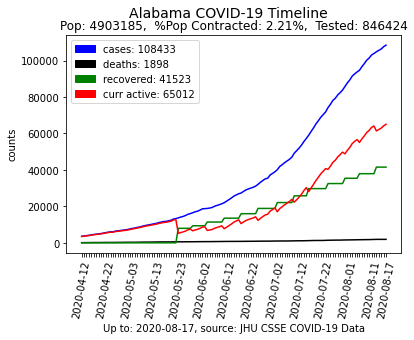

In [50]:
plot_jhu_data(df, 'Alabama')

## Plot All States

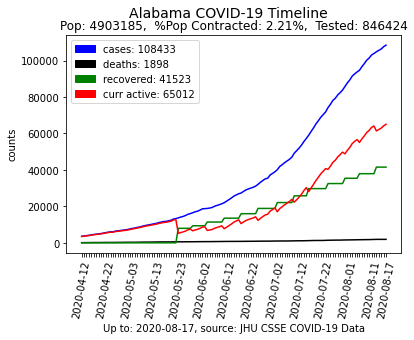

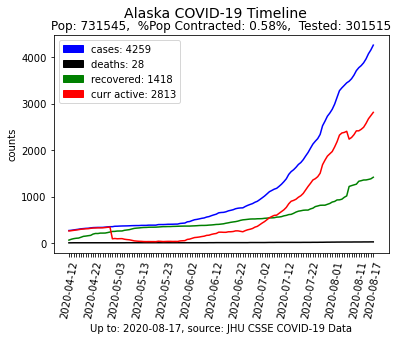

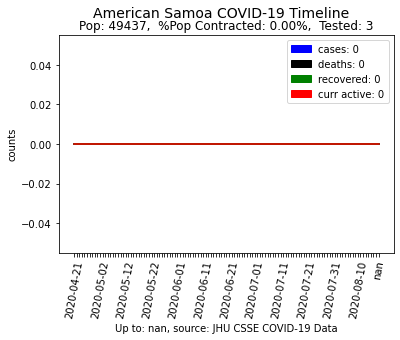

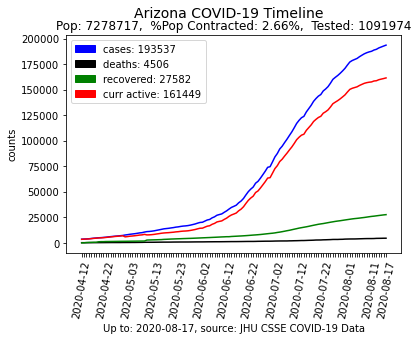

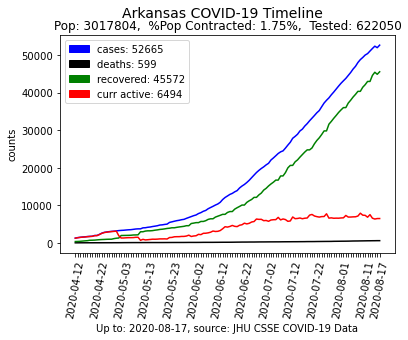

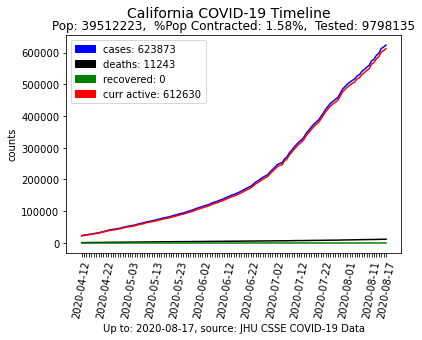

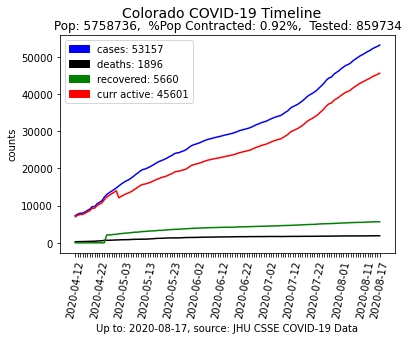

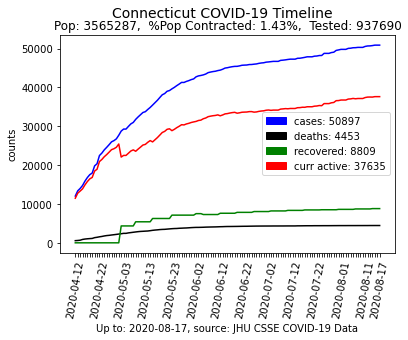

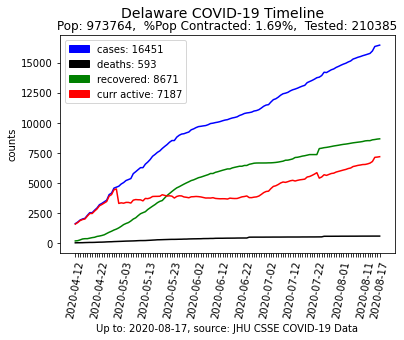

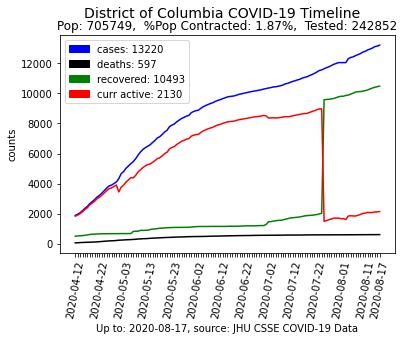

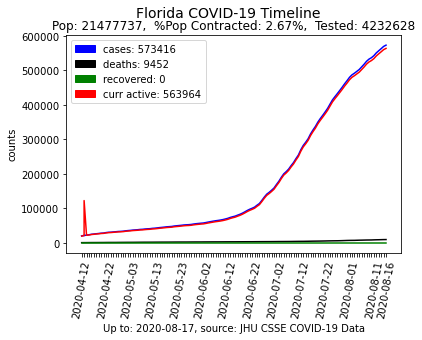

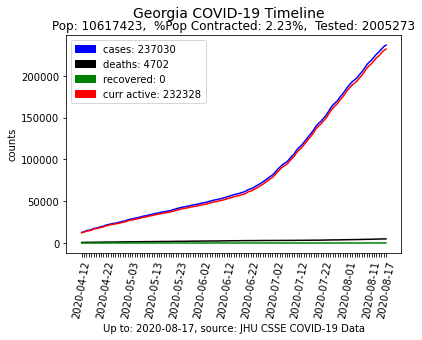

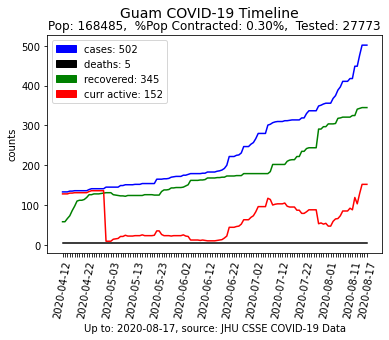

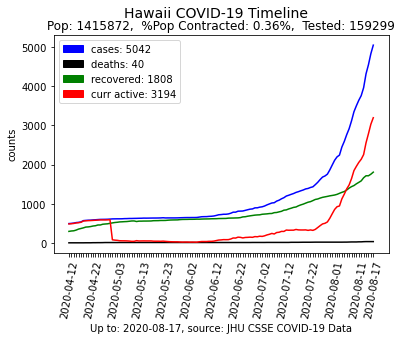

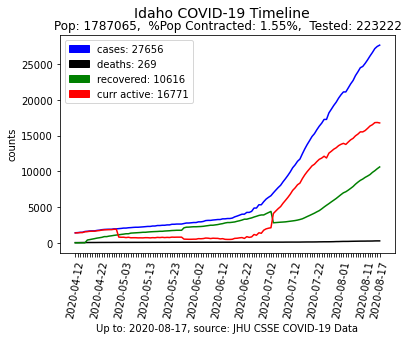

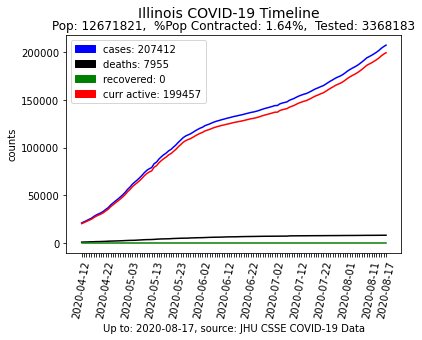

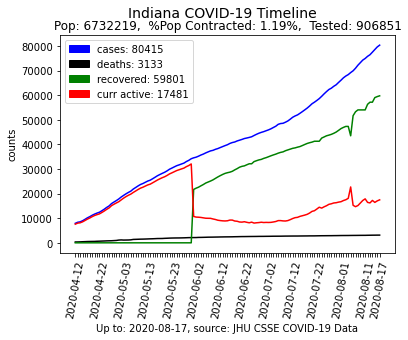

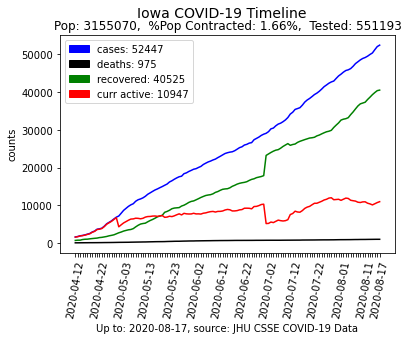

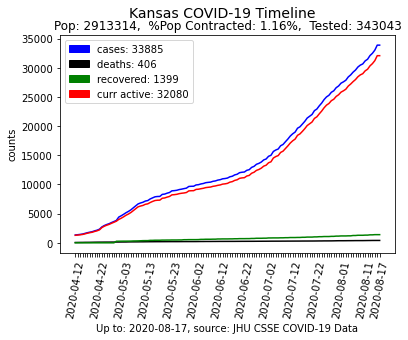

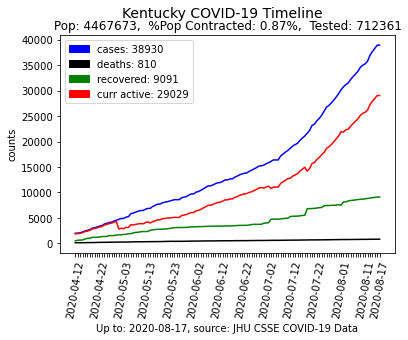

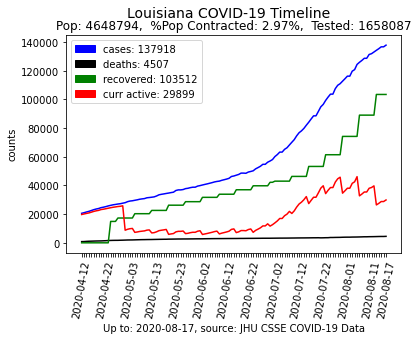

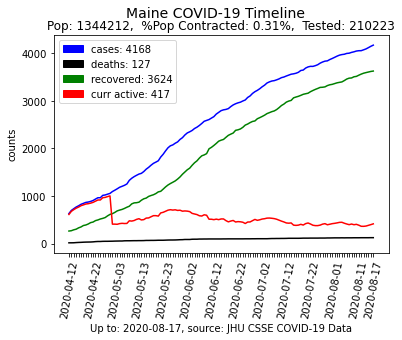

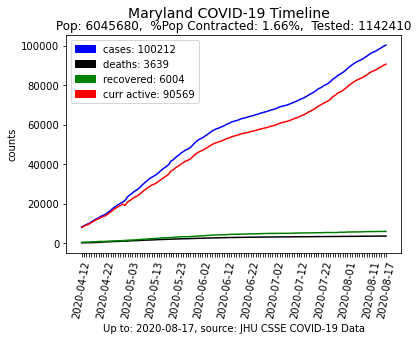

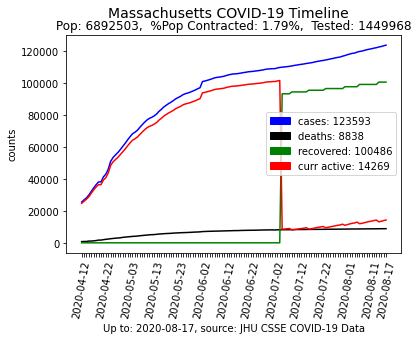

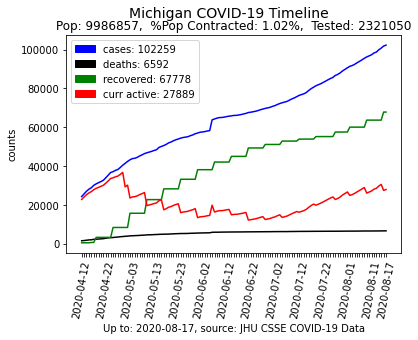

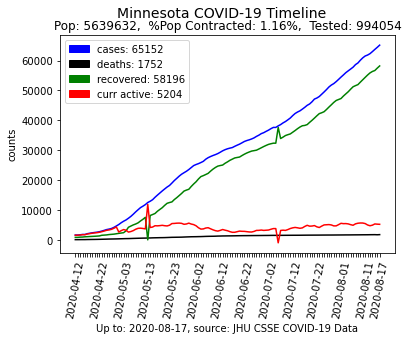

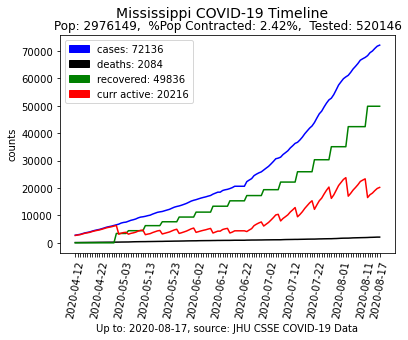

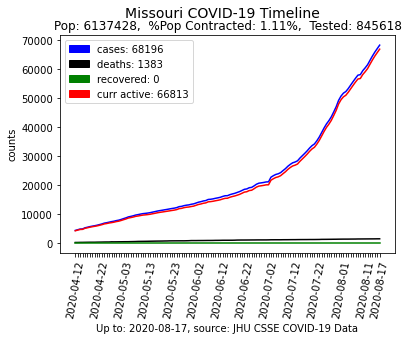

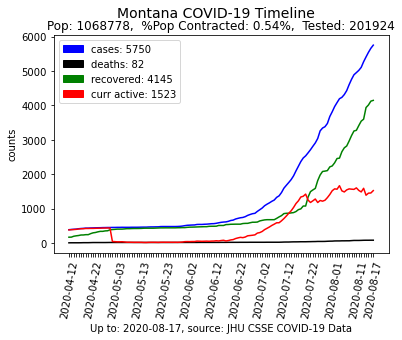

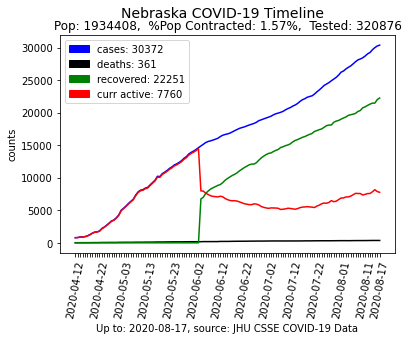

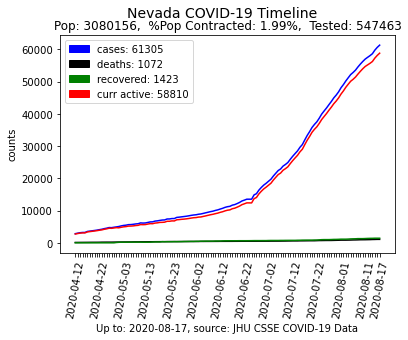

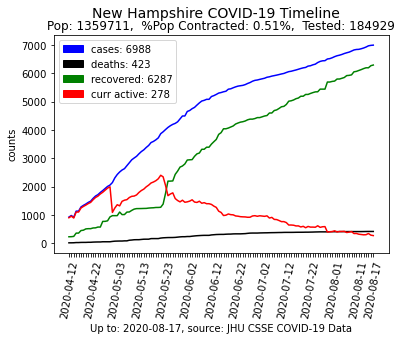

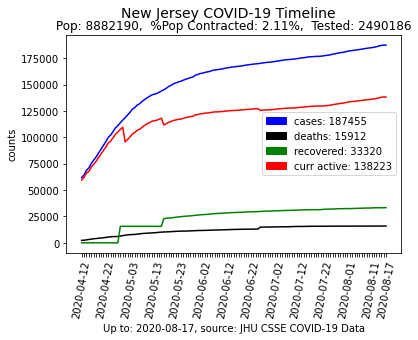

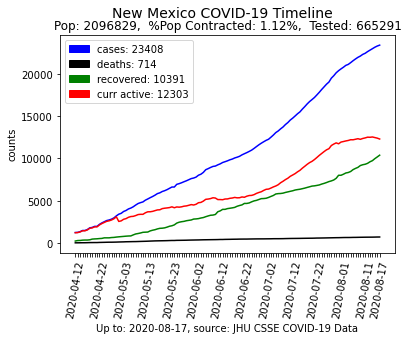

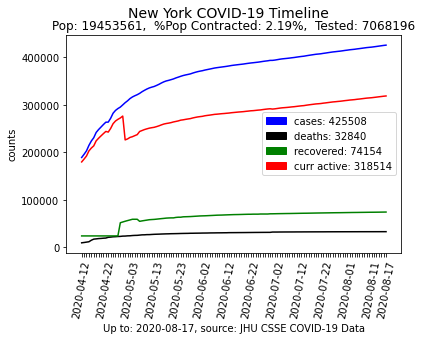

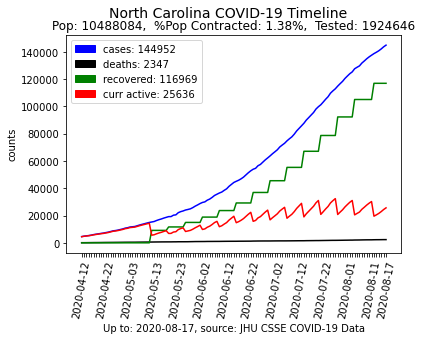

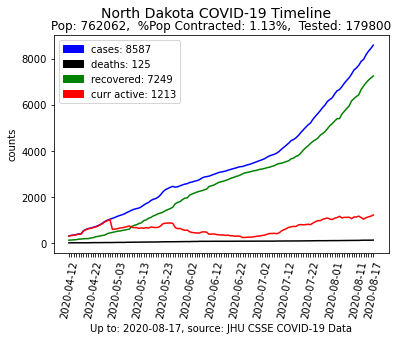

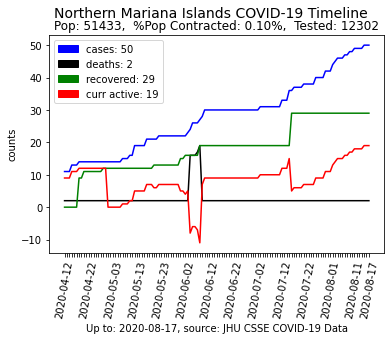

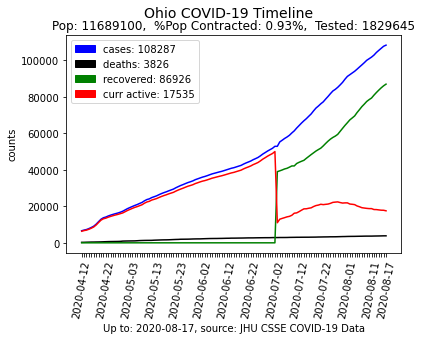

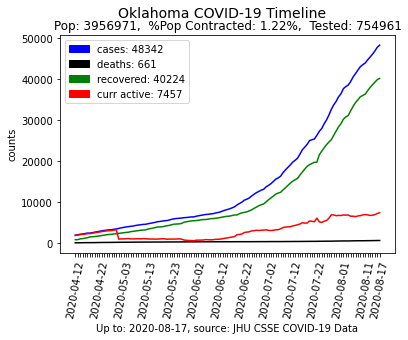

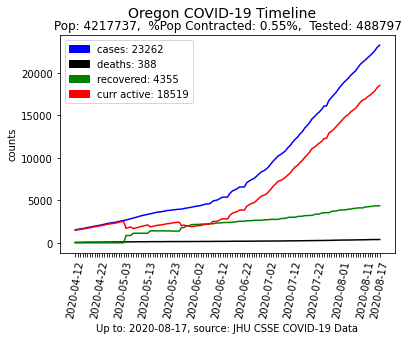

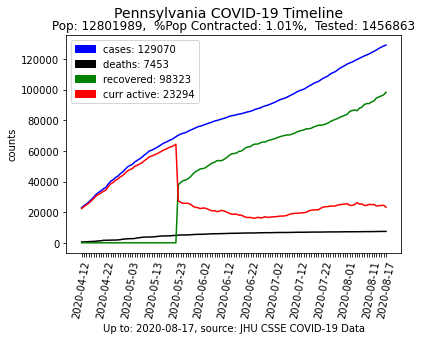

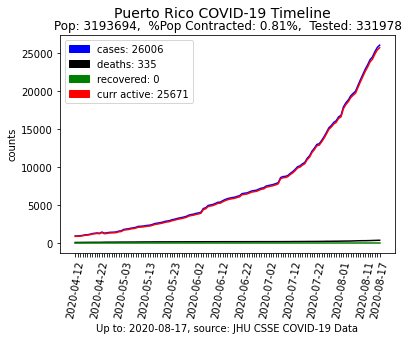

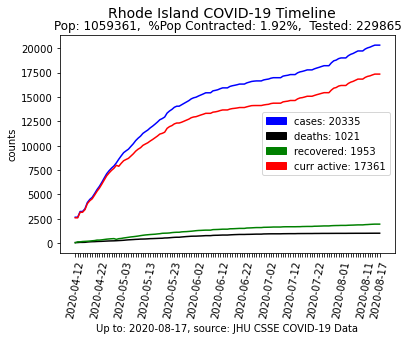

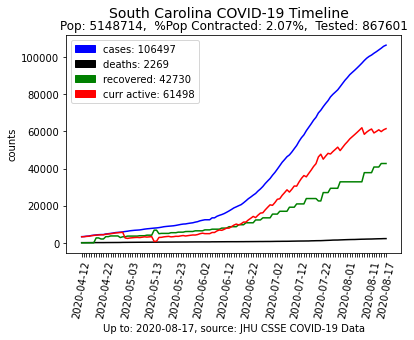

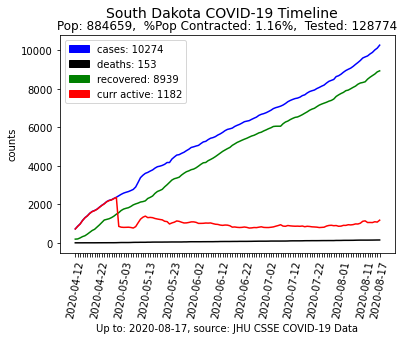

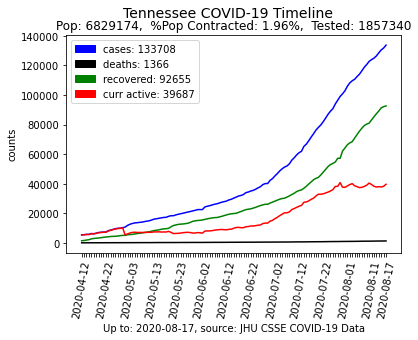

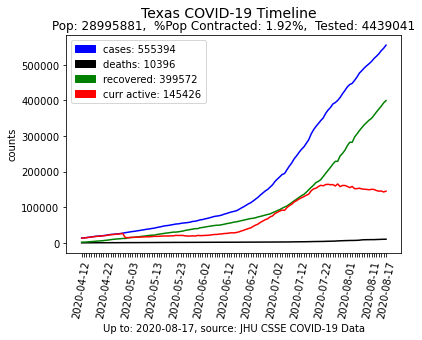

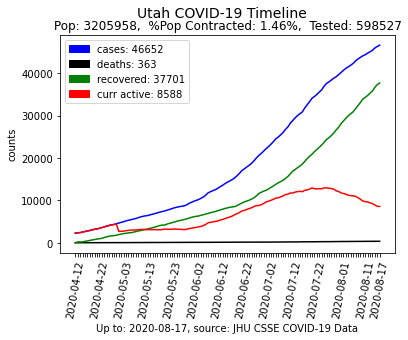

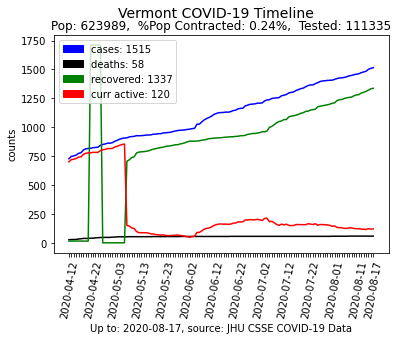

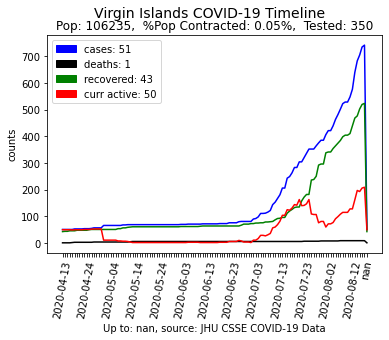

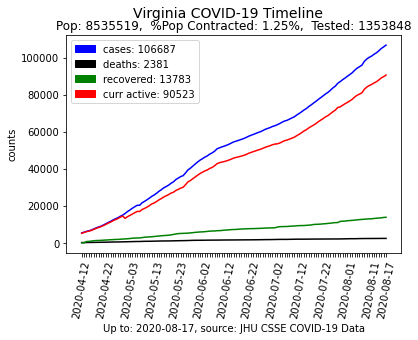

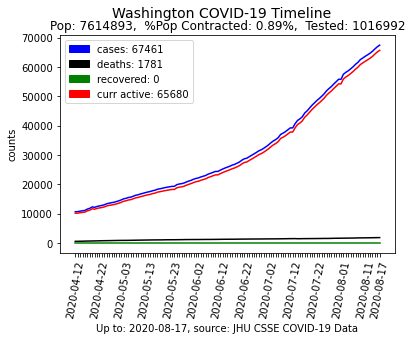

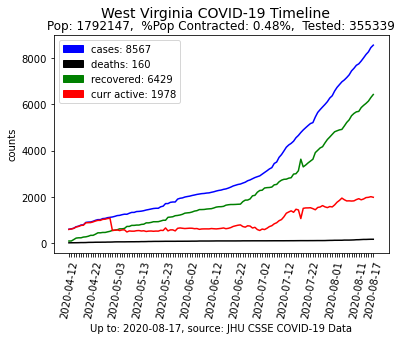

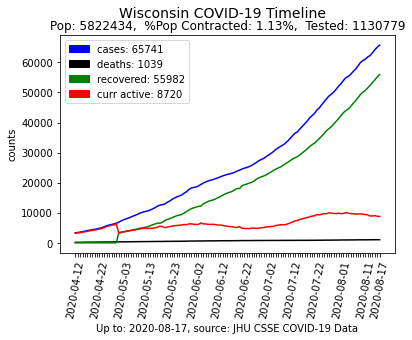

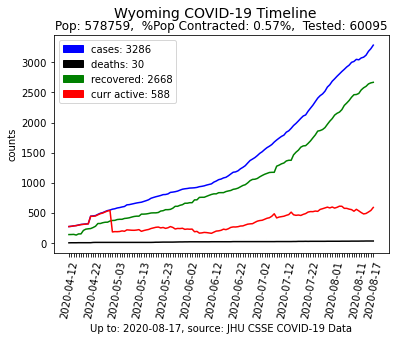

In [51]:
for state in df['Province_State'].unique():
    plot_jhu_data(df, state)
